<a href="https://colab.research.google.com/github/gojiteji/study_ReinforcementLearning_with_JAX/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import jax
import jax.numpy as jnp

In [13]:
from jax import random
key = random.PRNGKey(0)  # Random seed is explicit in JAX
randoms = random.uniform(key, shape=(11,))

In [15]:
rewards = []
Q=0
for i in range(1,11):
  Q = Q + (randoms[i] - Q)/i
  print(Q)

0.13573384
0.40354812
0.51077765
0.46997517
0.44336867
0.48235852
0.41620627
0.41607106
0.3877441
0.37382877


In [16]:
rewards = []
Q=0
for i in range(1,11):
  Q += (randoms[i] - Q)/i
  print(Q)

0.13573384
0.40354812
0.51077765
0.46997517
0.44336867
0.48235852
0.41620627
0.41607106
0.3877441
0.37382877


In [39]:
import time
class Bandit:
  def __init__(self,arms=10):
    key = random.PRNGKey(0)
    self.rates = random.uniform(key, shape=(arms,1))# defalt win rate
  def play(self, arm):
    rate = self.rates[arm]
    key = random.PRNGKey(int(time.time()*1000))
    if rate > random.uniform(key, shape=(1,1)):# is it larger than win rate?
      return 1
    else:
      return 0

In [40]:
bandit = Bandit()
for i in range(10):
  print(bandit.play(0))

0
1
0
1
0
1
1
0
0
0


In [44]:
bandit = Bandit()
Qs = jnp.zeros(10)#マシンごとに常態価値が存在
ns = jnp.zeros(10)#マシンのプレイ回数

In [65]:
for n in range(10):
    key = random.PRNGKey(int(time.time()*1000))
    action = random.randint(key,minval=0,maxval=10,shape=(1,))
    reward = bandit.play(action)
    ns = ns.at[action].set(ns[action]+1)
    Qs = Qs.at[action].set(Qs[action] + (reward - Qs[action])/ns[action])
    print(Qs)

[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.5 0.  1.  0. ]
[0.  0.  0.  0.  0.  0.  0.5 0.  1.  0. ]
[0.  0.  0.  0.  0.  0.  0.5 0.  1.  0. ]
[0.  0.  0.  0.  0.  0.  0.5 0.  1.  1. ]
[0.  0.  0.  0.  1.  0.  0.5 0.  1.  1. ]
[0.5 0.  0.  0.  1.  0.  0.5 0.  1.  1. ]
[0.5       0.        0.        0.        1.        0.        0.3333333
 0.        1.        1.       ]
[0.5       0.        0.        0.        1.        0.        0.3333333
 0.        1.        1.       ]


In [71]:
class Agent:
  def __init__(self,epsilon, action_size=10):
    self.epsilon = epsilon
    self.Qs = jnp.zeros(action_size)
    self.ns = jnp.zeros(action_size)
  def update(self, action, reward):
    self.ns = self.ns.at[action].set(self.ns[action]+1)
    self.Qs = self.Qs.at[action].set(self.Qs[action] + (reward - self.Qs[action])/self.ns[action])
  def get_action(self):
    key = random.PRNGKey(int(time.time()*1000))
    rnd = random.uniform(key, shape=(1,1))
    if rnd < self.epsilon:
      return random.randint(key,minval=0,maxval=len(self.Qs),shape=(1,))#ランダムにarmを選択する
    return jnp.argmax(self.Qs)#いちばん平均の良いarmを選択する

In [81]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0.
total_rewards = []
rates = []

for step in range(steps):
  action = agent.get_action()#actionを先に行う
  reward = bandit.play(action)#rewardが帰ってくる
  agent.update(action, reward)
  total_reward += reward

  total_rewards.append(total_reward)
  rates.append(total_reward / (step + 1))
print(total_reward)


722.0


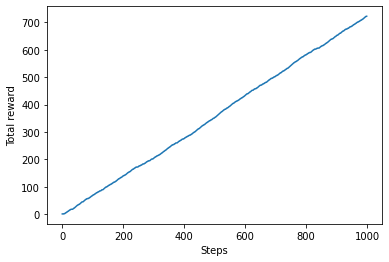

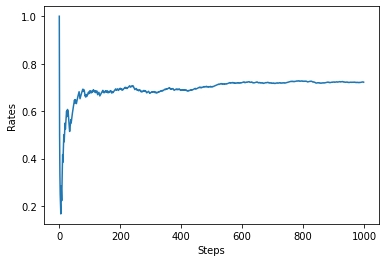

In [82]:
# グラフの描画(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()
# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()


In [89]:
steps = 1000
epsilon = 0.1
runs=20


agent = Agent(epsilon)
total_rewards = []
all_rates = jnp.zeros((runs,steps))
from tqdm import tqdm
for run in tqdm(range(runs)):

  rates=[]
  agent = Agent(epsilon)
  total_reward = 0.
  for step in range(steps):
    action = agent.get_action()#actionを先に行う
    reward = bandit.play(action)#rewardが帰ってくる
    agent.update(action, reward)
    total_reward += reward
    rates.append(total_reward / (step + 1))

  all_rates = all_rates.at[run].set(rates)

avg_rates = jnp.average(all_rates,axis=0)    
# グラフの描画 

100%|██████████| 20/20 [03:56<00:00, 11.80s/it]


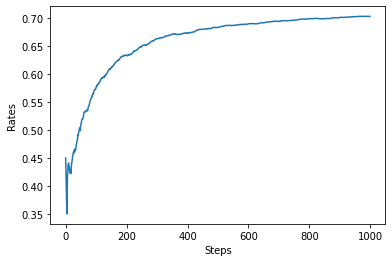

In [90]:
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()